In [48]:
demo_path = "/home/tlips/bc_data/planar_push/gello"
import os 

demos = os.listdir(demo_path)
print(demos)
demo = demos[1]

['0603_133527', '0603_132015', '0603_133202', '0603_131308', '0603_124220', '0603_133416', '0603_132809', '0603_133018', '0603_132946', '0603_131530', '0603_132847', '0603_132207', '0603_132230', '0603_131430', 'planar_push_gello.zip', '0603_133222', '0603_132751', '0603_131642', '0603_132552', '0603_133128', '0603_131503', '0603_133113', '0603_132434', '0603_133452', '0603_124158', '0603_132412', '0603_132448', '0603_131333', '0603_133249', '0603_131911', '0603_133351', '0603_131750', '0603_133322', '0603_132128', '0603_133043', '0603_131358', '0603_131712', '0603_131814', '0603_124118', '0603_132318', '0603_131948', '0603_132500', '0603_124053', '0603_132528', '0603_124025', '0603_131618', '0603_131557', '0603_124250', '0603_132903', '0603_132343', '0603_124000']


In [49]:
pickles = os.listdir(os.path.join(demo_path, demo))
# order by time
pickles.sort()

print(pickles)

pickle_path = pickles[0]

['2024-06-03T13:20:15.500611.pkl', '2024-06-03T13:20:15.604852.pkl', '2024-06-03T13:20:15.705989.pkl', '2024-06-03T13:20:15.803803.pkl', '2024-06-03T13:20:15.910163.pkl', '2024-06-03T13:20:16.006589.pkl', '2024-06-03T13:20:16.101510.pkl', '2024-06-03T13:20:16.205404.pkl', '2024-06-03T13:20:16.298717.pkl', '2024-06-03T13:20:16.401480.pkl', '2024-06-03T13:20:16.501497.pkl', '2024-06-03T13:20:16.603463.pkl', '2024-06-03T13:20:16.705696.pkl', '2024-06-03T13:20:16.803999.pkl', '2024-06-03T13:20:16.903649.pkl', '2024-06-03T13:20:17.003188.pkl', '2024-06-03T13:20:17.102024.pkl', '2024-06-03T13:20:17.204880.pkl', '2024-06-03T13:20:17.304974.pkl', '2024-06-03T13:20:17.403507.pkl', '2024-06-03T13:20:17.506161.pkl', '2024-06-03T13:20:17.603554.pkl', '2024-06-03T13:20:17.703352.pkl', '2024-06-03T13:20:17.804126.pkl', '2024-06-03T13:20:17.903810.pkl', '2024-06-03T13:20:18.004677.pkl', '2024-06-03T13:20:18.103931.pkl', '2024-06-03T13:20:18.206814.pkl', '2024-06-03T13:20:18.303143.pkl', '2024-06-03T1

In [50]:
import pickle

obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))

In [51]:
print(obs.keys())
# for k,v in obs.items():
#     print(k)
#     print(v)

dict_keys(['wrist_rgb', 'wrist_depth', 'base_rgb', 'base_depth', 'joint_positions', 'tcp_pose_quat', 'gripper_position', 'wrench', 'control'])


In [52]:
positions = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    pose = obs["tcp_pose_quat"]
    position = pose[:3]
    positions.append(position)

In [53]:
import open3d 

# jet color scheme 
import cv2
import numpy as np

# visualize the positions
pcd = open3d.geometry.PointCloud()
# encode the colors using the spectral color scheme according to time

pcd.points = open3d.utility.Vector3dVector(positions)
colors = []
for i in range(len(positions)):
    color = cv2.applyColorMap(np.array(i/len(positions)*255,dtype=np.uint8), cv2.COLORMAP_CIVIDIS)
    colors.append(color[0][0]/255)



pcd.colors = open3d.utility.Vector3dVector(colors)

# add a coordinate frame of the robot
frame = open3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0,0,0])

open3d.visualization.draw_geometries([pcd, frame])


In [54]:
# get the wrist camera images and display them 
import cv2
import numpy as np
import matplotlib.pyplot as plt

wrist_images = []
base_images = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    img = obs["wrist_rgb"]
   # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.uint8)
    wrist_images.append(img)

    img = obs["base_rgb"]
    img = img.astype(np.uint8)
    base_images.append(img)

# create ipywidget slider to display the  numpy array images
import ipywidgets as widgets
from IPython.display import display
slider = widgets.IntSlider(min=0, max=len(wrist_images)-1)

def view_image(i):
    wrist_img = wrist_images[i]
    base_img = base_images[i]
    
    # display the image
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(wrist_img)
    ax[1].imshow(base_img)
    plt.show()

image_widget = widgets.interactive(view_image, i=slider)
display(image_widget)


interactive(children=(IntSlider(value=0, description='i', max=197), Output()), _dom_classes=('widget-interact'…

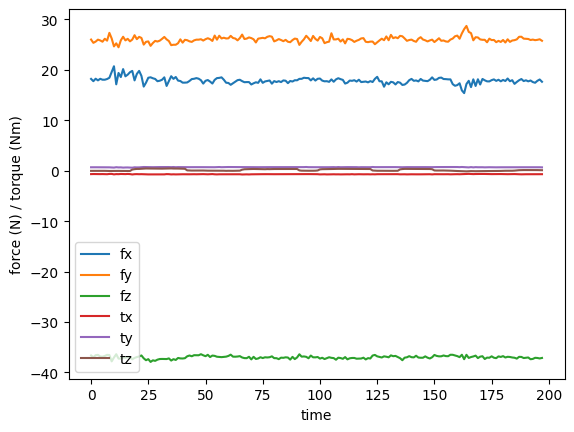

In [55]:
# visualize the FT wrench timeseries

ft_wrench = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    ft = obs["wrench"]
    ft_wrench.append(ft)


ft_wrench = np.array(ft_wrench)

# plot the timeseries
plt.plot(ft_wrench)
plt.xlabel("time")
plt.ylabel("force (N) / torque (Nm)")
plt.legend(["fx", "fy", "fz", "tx", "ty", "tz"])
